In [133]:
import pandas as pd
import os

os.chdir('/Users/teresabono/Documents/UCL/Task/kaggle-retail-prods')

from config import Config

import numpy as np
import os
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [132]:
data_path = Config.data_path

In [134]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path / 'train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(Config.IMG_HEIGHT, Config.IMG_WIDTH),
  batch_size=Config.BATCH_SIZE)

Found 33600 files belonging to 21 classes.
Using 26880 files for training.


In [135]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path / 'train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(Config.IMG_HEIGHT, Config.IMG_WIDTH),
  batch_size=Config.BATCH_SIZE)

Found 33600 files belonging to 21 classes.
Using 6720 files for validation.


In [136]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


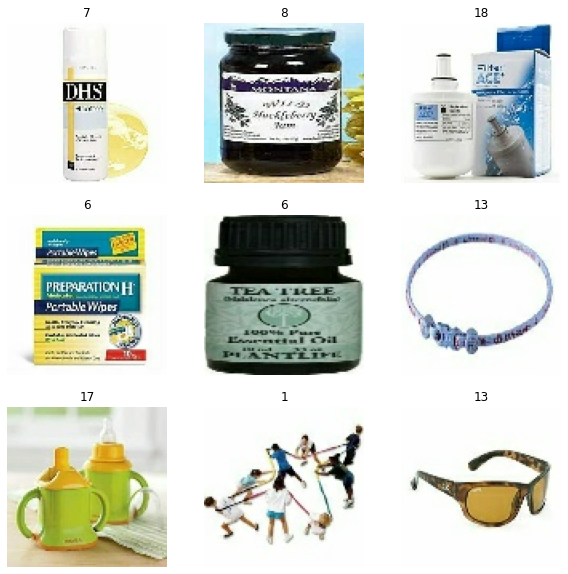

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [138]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [139]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(Config.IMG_HEIGHT, Config.IMG_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [140]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 25, 25, 64)      

In [142]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
840/840 [==============================] - 65s 75ms/step - loss: 2.8290 - accuracy: 0.1501 - val_loss: 2.6785 - val_accuracy: 0.1988
Epoch 2/10
840/840 [==============================] - 59s 70ms/step - loss: 2.5118 - accuracy: 0.2535 - val_loss: 2.5890 - val_accuracy: 0.2368
Epoch 3/10
840/840 [==============================] - 60s 72ms/step - loss: 2.2177 - accuracy: 0.3384 - val_loss: 2.5748 - val_accuracy: 0.2658
Epoch 4/10
840/840 [==============================] - 62s 74ms/step - loss: 1.8564 - accuracy: 0.4447 - val_loss: 2.6253 - val_accuracy: 0.2713
Epoch 5/10
840/840 [==============================] - 61s 72ms/step - loss: 1.4539 - accuracy: 0.5603 - val_loss: 2.9183 - val_accuracy: 0.2737
Epoch 6/10
840/840 [==============================] - 60s 72ms/step - loss: 1.0622 - accuracy: 0.6763 - val_loss: 3.5125 - val_accuracy: 0.2653
Epoch 7/10
840/840 [==============================] - 62s 74ms/step - loss: 0.7311 - accuracy: 0.7775 - val_loss: 4.3375 - val_accuracy:

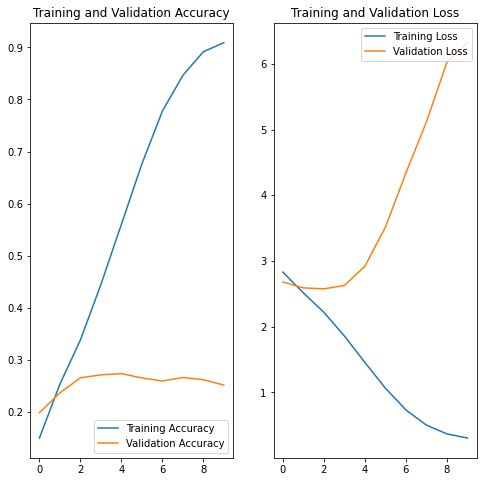

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [147]:
model.__dict__

{'_self_setattr_tracking': True,
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping <keras.utils.generic_utils.Config object at 0x7f7f0903ded0>>: 1, <_ObjectIdentityWrapper wrapping <keras.optimizers.optimizer_experimental.adam.Adam object at 0x7f7f0903dff0>>: 1, <_ObjectIdentityWrapper wrapping <keras.engine.compile_utils.LossesContainer object at 0x7f7f0903df30>>: 1, <_ObjectIdentityWrapper wrapping <keras.engine.compile_utils.MetricsContainer object at 0x7f7f0903d960>>: 1, <_ObjectIdentityWrapper wrapping True>: 1, <_ObjectIdentityWrapper wrapping <keras.losses.SparseCategoricalCrossentropy object at 0x7f7f0902bc10>>: 1, <_ObjectIdentityWrapper wrapping <keras.callbacks.History object at 0x7f7f0903de40>>: 1, <_ObjectIdentityWrapper wrapping <tensorflow.python.eager.polymorphic_function.polymorphic_function.Function object at 0x7f7f0902bee0>>: 2, <_ObjectIdentityWrapper wrapping <tensorflow.python.eager.polymorphic_function.polymorphic_function.

In [149]:
predictions = model.predict(val_ds)

210/210 [==============================] - 4s 17ms/step


In [153]:
predictions.shape

(6720, 21)

In [174]:
class_predicted = np.argmax(predictions, axis=1)

In [175]:
predicted_prob = np.max(tf.nn.softmax(predictions), axis=1)

In [182]:
label = np.concatenate([y for x, y in val_ds], axis=0)

In [183]:
pred_val = pd.DataFrame({'label':label, 'label_hat':class_predicted, 'y_hat':predicted_prob})

In [189]:
labels_map = pd.read_csv(data_path / 'labels.csv')
preds_val = pred_val.merge(labels_map, on='label')

In [197]:
# accuracy by category 

accuracy_val = len(preds_val[preds_val['label']==preds_val['label_hat']]) / len(preds_val)

In [198]:
accuracy_val_by_label = preds_val[preds_val['label']==preds_val['label_hat']].groupby('label').size() / preds_val.groupby('label').size()

In [204]:
accuracy_val_by_label.reset_index().merge(labels_map, on='label')

,label,0,categories
0,0,0.341216,Electronics
1,1,0.137821,Sports & Outdoors
2,2,0.231198,Cell Phones & Accessories
3,3,0.245033,Automotive
4,4,0.122754,Toys & Games
5,5,0.286174,Tools & Home Improvement
6,6,0.197492,Health & Personal Care
7,7,0.383387,Beauty
8,8,0.256798,Grocery & Gourmet Food
9,9,0.220447,Office Products
